In [23]:
#! pip install nltk
# ! pip install Rouge

In [85]:
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
import pandas as pd

In [86]:
!ls *.csv

Bard.csv
GPT4.csv
heart_disease_uci copy.csv
heart_disease_uci.csv
llama.csv
socring_llm-Mathematical_calculations.csv
socring_llm-coding.csv
socring_llm-domains_knowledge.csv
socring_llm-visualiztion.csv


In [87]:
df=pd.read_csv('Bard.csv')

In [88]:
def bleu_scores(data):
    bleu_scores=[]
    for _,row in data.iterrows():
        reference=row["Abstract"]
        candidate=row["Task Description"]
        score=sentence_bleu([reference.split()],candidate.split())
        bleu_scores.append(score)
    return bleu_scores

In [89]:
# df['Score']=bleu_scores(df)

In [90]:
# average_scores = []
# for i in range(0, len(df), 10):
#     average_score = sum(df['Score'][i:i+10]) / 10
#     average_scores.append(average_score)

#average_scores

In [109]:
rouge = Rouge()
def calculate_rouge_scores(data):
    rouge_scores = []
    for _, row in data.iterrows():
        reference = row['Abstract']
        candidate = row['Task Description']
        score = rouge.get_scores(candidate, reference)
        rouge_scores.append(score[0]['rouge-l']['f'])
    return rouge_scores

def avg_scores(data):
    average_scores=[]
    for i in range(0, len(data), 10):
        average_score = sum(data['rouge'][i:i+10]) / 10
        average_scores.append(average_score)
    return average_scores

In [110]:
df['rouge']=calculate_rouge_scores(df)
# avg_scores(df)
df.mean()

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_21560/536545602.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


rouge    0.305121
dtype: float64

In [111]:
gpt=pd.read_csv('GPT4.csv')
gpt['rouge']=calculate_rouge_scores(gpt)
#avg_scores(gpt)
gpt.mean()

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_21560/817364737.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gpt.mean()


rouge    0.3496
dtype: float64

In [112]:
llama=pd.read_csv('llama.csv')
llama['rouge']=calculate_rouge_scores(llama)
#avg_scores(llama)
llama.mean()

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_21560/4201821741.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  llama.mean()


rouge    0.198853
dtype: float64

In [66]:
df_new=pd.DataFrame()
df_new['Task']=[1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10]
df_new['Chat']=['S','N','S','N','S','N','S','N','S','N','S','N','S','N','S','N','S','N','S','N']
df_new['gpt4']=avg_scores(gpt)
df_new['llama']=avg_scores(llama)
df_new['bard']=avg_scores(df)

In [83]:
df_new.groupby(['Task']).mean().reset_index()

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_21560/2327373324.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_new.groupby(['Task']).mean().reset_index()


,Task,gpt4,llama,bard
0,1,0.410249,0.268176,0.440933
1,2,0.284987,0.231465,0.308612
2,3,0.449719,0.234400,0.462115
3,4,0.471674,0.220878,0.232015
4,5,0.396009,0.224553,0.254280
5,6,0.411845,0.208642,0.253270
6,7,0.465466,0.244798,0.378070
7,8,0.148288,0.198326,0.153489
8,9,0.336746,0.205200,0.362972
9,10,0.358261,0.233612,0.428780


In [84]:
df_new.mean()

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_21560/1212866955.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.mean()


Task     5.500000
gpt4     0.373324
llama    0.227005
bard     0.327453
dtype: float64

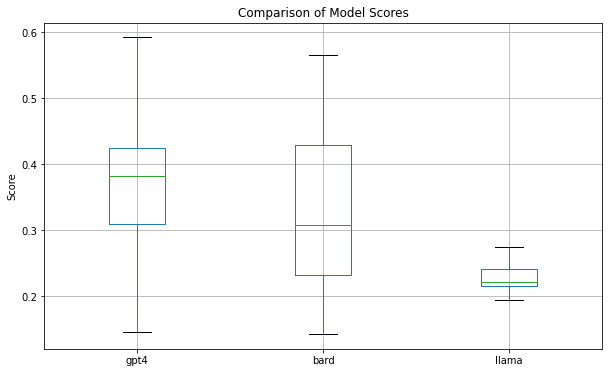

In [77]:
plt.figure(figsize=(10, 6))
boxplot = df_new.boxplot(column=['gpt4', 'bard', 'llama'])
plt.title('Comparison of Model Scores')
plt.ylabel('Score')
plt.show()

In [71]:
df_new.mean(axis=0)

/var/folders/q9/26n4cqmn2jq2ldd84q1459cm0000gn/T/ipykernel_21560/3259771588.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.mean(axis=0)


Task     5.500000
gpt4     0.373324
llama    0.227005
bard     0.327453
dtype: float64

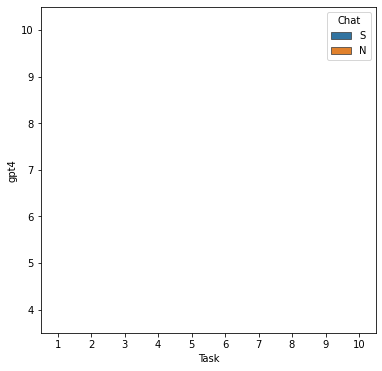

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))

a=sns.boxplot(x='Task', y='gpt4', hue='Chat', data=df_new)
#             palette=['violet', 'dodgerblue','lawngreen'], 
#               fliersize=0,boxprops={'edgecolor':('black'),'facecolor':(1,1,1,0)},zorder=5)

# sns.stripplot(x='Task', y='Score', hue='LLM', data=df_new, 
#               palette=['violet', 'dodgerblue','lawngreen'], dodge=True, jitter=True, 
#               alpha=0.7, zorder=1, size=8)


handles, labels = plt.gca().get_legend_handles_labels()

# handles_new = [handles[0], handles[2] , handles[1]]
# labels_new = [labels[0], 'Bard' , labels[1]]
# plt.legend(handles_new, labels_new)
a.set_ylim(3.5,10.5)

#plt.savefig('math.png', bbox_inches='tight',dpi=300)
plt.show()